Making this notebook to play with using array based observations rather than images. Let's start smaller.

In [2]:
import gymnasium as gym
from IPython.display import Video
import sys
import os

os.environ["SDL_VIDEODRIVER"] = "dummy" # this stops pygame opening it's own window


In [3]:
%load_ext autoreload

In [4]:
import gymnasium as gym
from environments.model_ready_boids import RavenChasingBoids

from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy


In [5]:
%autoreload 2
# Now import the function
import gym_utils
import controllers
import agents
import runners
import environments
from environments.simple_boids import PureBoinds, BoidsWithRavenoid
from gym_utils.vis import create_environment_video

In [6]:
env = BoidsWithRavenoid(100, render_mode="rgb_array")

In [7]:
env.action_space.sample()

0

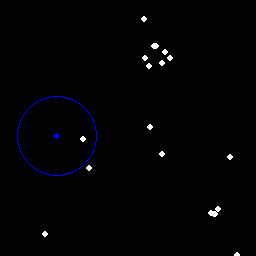

In [8]:
from PIL import Image
from environments.model_ready_boids import RavenChasingBoids
env = RavenChasingBoids(20, render_mode="rgb_array")
env.step(0)
for i in range(100):
    env.step(0)
arr = env.render()
Image.fromarray(arr)

In [226]:
env.previous_action

0

In [233]:
from stable_baselines3.common.env_checker import check_env
env = RavenChasingBoids(20, render_mode="rgb_array", observation_type="array")
check_env(env)

0 steps taken. Average steps per episode: nan
0 steps taken. Average steps per episode: nan
1 steps taken. Average steps per episode: nan


[1. 0. 0. 0. 0. 0. 0. 0.]


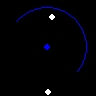

In [204]:
print(env.get_array_observation())
Image.fromarray(env.get_visual_observation())

In [1]:
import numpy as np

def get_array_observation(self):
        # TODO: this won't have the ability to see over to the next boundary
        nearby_agents = self.ravenoid.nearby_agents
        #nearby_agents = self.controller.get_agents()
        sight_distance = 40
        # calculate the distance and angle to each agent
        distances = []
        angles = []
        for agent in nearby_agents:
            if agent.id == self.ravenoid.id:
                continue
            distance = np.linalg.norm(agent.position - self.ravenoid.position)
            if distance > sight_distance: 
                continue
            angle = np.arctan2(agent.position[1] - self.ravenoid.position[1], agent.position[0] - self.ravenoid.position[0])
            if angle < 0:
                angle += 2 * np.pi
            distances.append(distance)
            angles.append(angle)
        # for each direction, count the number of agents in that direction
        counts = np.zeros(8)
        for distance, angle in zip(distances, angles):
            direction = int(np.round(angle / (2 * np.pi) * 8)) % 8
            counts[direction] += 1
        return counts
#env.step(0)
print(get_array_observation(env))
Image.fromarray(env.get_visual_observation())

NameError: name 'env' is not defined

In [200]:
angle = (0/8 - np.pi)*2*np.pi
#if angle < 0:
#    angle += 2 * np.pi
int(np.round(angle / (2 * np.pi) * 8)) % 8

7

In [150]:
np.pi

3.141592653589793

In [245]:
from gym_utils.vis import create_environment_video_with_model

env = RavenChasingBoids(20, render_mode="rgb_array", observation_type="array")
model = DQN.load("../training/model_training_111824_1", env=env)

video_filename = 'ravenoid.mp4'
create_environment_video_with_model(model, video_filename, steps=4000)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
0 steps taken. Average steps per episode: nan
1087 steps taken. Average steps per episode: 1087.0


In [246]:
Video(video_filename)

In [272]:
env_model = model.get_env()

In [273]:
obs = env_model.reset()

1 steps taken. Average steps per episode: nan


In [274]:
obs

(array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 {})

In [268]:
obs[:,3] = 1
obs[:,5] = 4
np.argmax(obs)

5

In [271]:
obs

array([[0., 0., 0., 1., 2., 4., 0., 0.]])

In [270]:
class JustFollowModel:
    def __init__(self, env):
        self.action_space = env.action_space
        self.env = env

    def predict(self, observation, state=None, episode_start=None, deterministic=None):
        action = np.argmax(obs)
        return action, state

    def get_env(self): return self.env
        
env = RavenChasingBoids(10, render_mode="rgb_array")
print(env.history)
model = JustFollowModel(env)

from gym_utils.vis import create_environment_video_with_model

video_filename = 'mock_boids.mp4'
create_environment_video_with_model(model, video_filename, steps=1000)
print(env.history)
Video(video_filename)

[]
0 steps taken. Average steps per episode: nan


/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/patrick/Projects/active_projects/zero-player-games/zero-player-games/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: too many values to unpack (expected 4)